In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fname = 'firas_monopole_spec_v1.txt'
data = np.loadtxt(fname, dtype=np.float)

In [26]:
pc = 6.626e-34
sol = 3e8
bc = 1.381e-23

In [45]:
freqs = data[:, 0] * 3e10
spectra_f = data[:, 1] * 1e-20
unc_f = data[:, 3] * 1e-20
waves = sol / freqs
spectra_w = spectra_f * freqs**2 / sol
unc_w = unc_f * freqs**2 / sol

In [42]:
def bb_f(freq, temp):
    return 2 * pc * freq**3 / sol**2 / (np.exp(pc * freq / (bc * temp)) - 1)

def bb_w(waves, temp):
    return 2 * pc * sol**2 / waves**5 / (np.exp(pc * sol / (waves * bc * temp)) - 1)

<IPython.core.display.Javascript object>


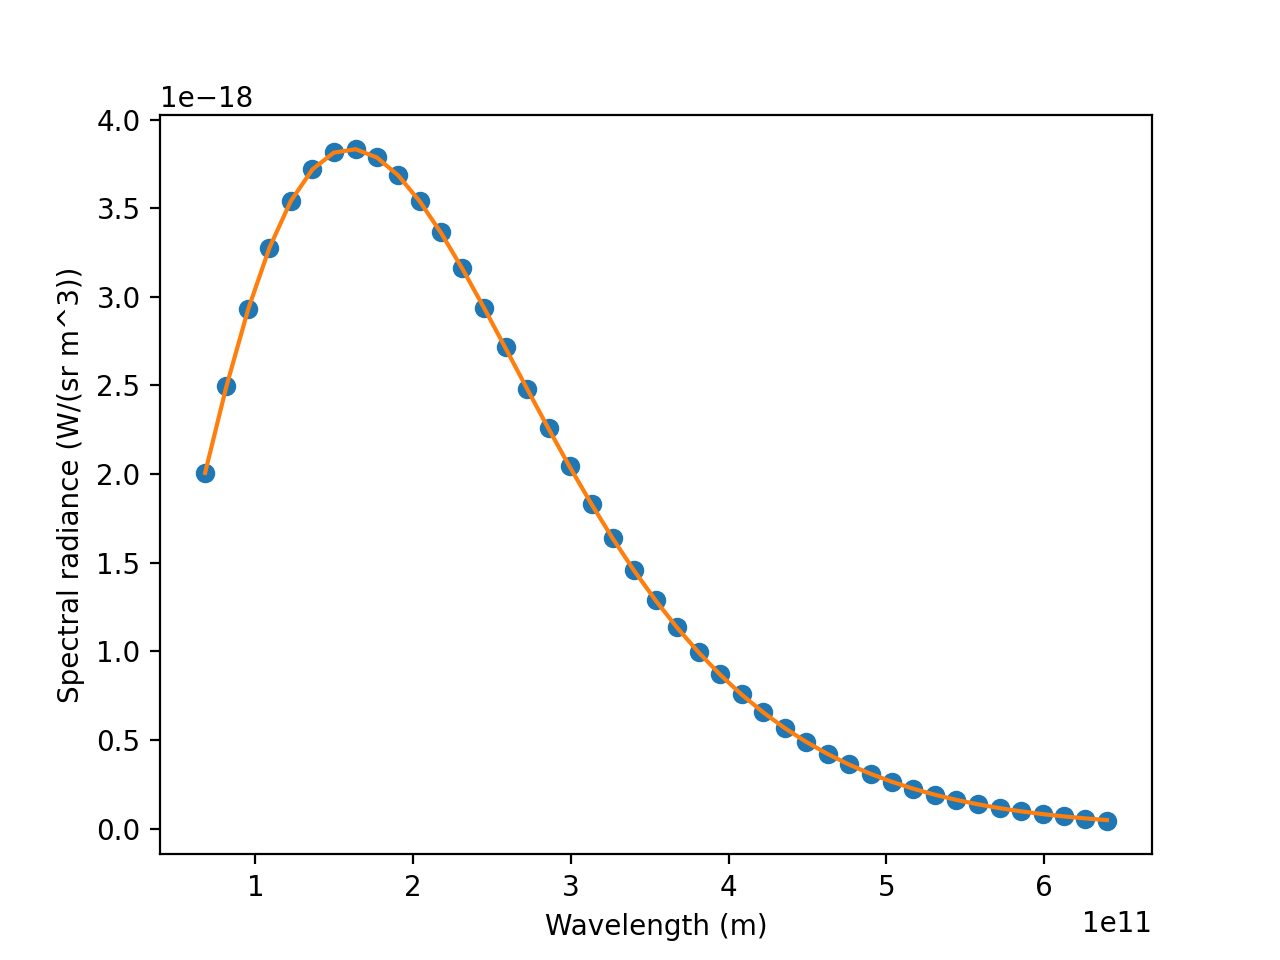

Text(0.5, 0, 'Wavelength (m)')

In [52]:
plt.figure()
plt.plot(freqs, spectra_f, 'o', label="COBE Data")
plt.errorbar(freqs, spectra_f, yerr=unc_f, linestyle='none')
plt.plot(freqs, bb_f(freqs, 2.725), label="Blackbody")

<IPython.core.display.Javascript object>


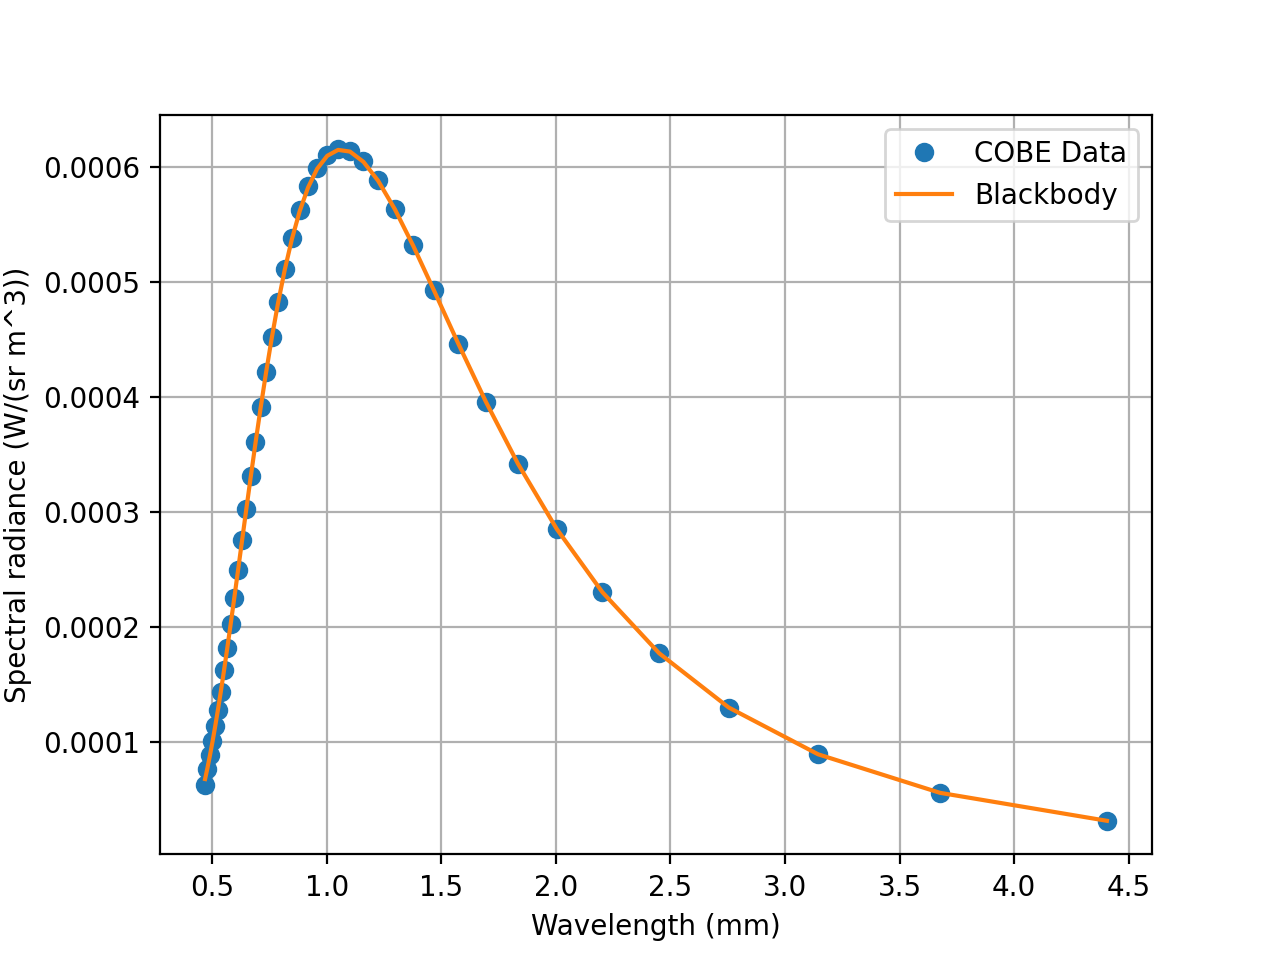

In [58]:
plt.figure()
plt.plot(1e3 * waves, spectra_w, 'o', label='COBE Data')
# plt.errorbar(waves, spectra_w, yerr=unc_w, linestyle='none')
plt.plot(1e3 * waves, bb_w(waves, 2.725), label='Blackbody')
plt.ylabel('Spectral radiance (W/(sr m^3))')
plt.xlabel('Wavelength (mm)')
plt.legend()
plt.grid(True)